# Random forest

## 1. Creating the worldbank dataframe

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [41]:
df = df.iloc[54000:,]
df.drop(columns=df.iloc[:,3:54].columns.tolist(), inplace=True)
df.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df.rename({'Country Name':'Country'},inplace=True,axis=1)
df = df.loc[df.Indicator.str.contains('1=yes; 0=no')]
df.head()

,Country,Country Code,Indicator,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
54000,Afghanistan,AFG,A woman can apply for a passport in the same w...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54001,Afghanistan,AFG,A woman can be head of household in the same w...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
54002,Afghanistan,AFG,A woman can choose where to live in the same w...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
54003,Afghanistan,AFG,A woman can get a job in the same way as a man...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
54004,Afghanistan,AFG,A woman can obtain a judgment of divorce in th...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df = df.assign(Mean_GV=df.mean(axis=1, numeric_only=True))

In [43]:
df.drop(columns=df.iloc[:,3:16].columns.tolist(), inplace=True)
df.head()

,Country,Country Code,Indicator,Mean_GV
54000,Afghanistan,AFG,A woman can apply for a passport in the same w...,0.000000
54001,Afghanistan,AFG,A woman can be head of household in the same w...,1.000000
54002,Afghanistan,AFG,A woman can choose where to live in the same w...,0.923077
54003,Afghanistan,AFG,A woman can get a job in the same way as a man...,0.923077
54004,Afghanistan,AFG,A woman can obtain a judgment of divorce in th...,0.000000


In [44]:
df = pd.pivot(df, index=['Country','Country Code'], columns = 'Indicator',values = 'Mean_GV')
df.head()

,Indicator,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can travel outside the country in the same way as a man (1=yes; 0=no),...,The law grants spouses equal administrative authority over assets during marriage (1=yes; 0=no),The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no),The law prohibits discrimination in access to credit based on gender (1=yes; 0=no),The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no)
Country,Country Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,0.0,1.0,0.923077,0.923077,0.0,1.0,1.0,0.0,0.538462,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.538462,0.000000,0.0
Albania,ALB,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0
Algeria,DZA,1.0,1.0,1.000000,1.000000,0.0,1.0,1.0,0.0,0.000000,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.000000,0.538462,0.0
American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Creating the Gender Inequality Index (GII) dataframe

In [45]:
df1 = pd.read_excel('./data/imf-dm-export-20230501 (4).xlsx',sheet_name='GII_TC')
df1 = df1.iloc[1:,]
df1.drop(columns=df1.iloc[:,1:21].columns.tolist(), inplace=True)
df1.replace('no data', np.nan, inplace=True)
df1.rename({'Gender Inequality Index (GII) Time Consistent (Index)': 'Country'}, inplace = True, axis=1)

In [46]:
df1 = df1.assign(Mean_GII=df1.mean(axis=1, numeric_only=True))

GII_label = []
for value in df1['Mean_GII']:
    if value > 0.54:
        GII_label.append('Large')
    elif value <= 0.54 and value > 0.37:
        GII_label.append('Middle-Large')
    elif value <= 0.37 and value >= 0.16:
        GII_label.append('Middle-Small')
    else:
        GII_label.append("Small")
      
df1["GII_Label"] = GII_label  
df1.drop(columns=df1.iloc[:,1:5].columns.tolist(), inplace=True)
df1.replace('Syria', 'Syrian Arab Republic', inplace = True)
df1.replace('Korea, Republic of', "Korea, Dem. People's Rep.", inplace = True) 
df1.replace("China, People's Republic of", 'China', inplace = True)
df1.replace('Türkiye, Republic of', 'Turkiye', inplace = True)
df1.replace('Yemen', 'Yemen, Rep.', inplace = True)
df1.replace('Venezuela', 'Venezuela, RB', inplace = True)
df1.replace('Iran', 'Iran, Islamic Rep.', inplace = True)
df1.replace('Congo, Dem. Rep. of the', 'Congo, Dem. Rep.', inplace = True)
df1.replace('Czech Republic', 'Czechia', inplace = True)
df1.replace('Egypt', 'Egypt, Arab Rep.', inplace = True)

In [47]:
df1.head()

,Country,Mean_GII,GII_Label
1,Afghanistan,0.7000,Large
2,Albania,0.2350,Middle-Small
3,Algeria,0.4450,Middle-Large
4,Argentina,0.3775,Middle-Large
5,Armenia,0.3300,Middle-Small


## 3. Merge the dataframes

In [48]:
df=df.merge(df1,how='left',left_on='Country', right_on='Country')
df.head()

,Country,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),...,The law prohibits discrimination in access to credit based on gender (1=yes; 0=no),The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),Mean_GII,GII_Label
0,Afghanistan,0.0,1.0,0.923077,0.923077,0.0,1.0,1.0,0.0,0.538462,...,1.0,0.0,0.0,1.0,0.0,0.538462,0.000000,0.0,0.700,Large
1,Albania,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.235,Middle-Small
2,Algeria,1.0,1.0,1.000000,1.000000,0.0,1.0,1.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.000000,0.538462,0.0,0.445,Middle-Large
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df = df[df.GII_Label.notnull()]
df.head()

,Country,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),...,The law prohibits discrimination in access to credit based on gender (1=yes; 0=no),The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),Mean_GII,GII_Label
0,Afghanistan,0.0,1.0,0.923077,0.923077,0.0,1.0,1.0,0.0,0.538462,...,1.0,0.0,0.0,1.000000,0.000000,0.538462,0.000000,0.0,0.7000,Large
1,Albania,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.2350,Middle-Small
2,Algeria,1.0,1.0,1.000000,1.000000,0.0,1.0,1.0,0.0,0.000000,...,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.538462,0.0,0.4450,Middle-Large
7,Argentina,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,0.0,1.000000,...,1.0,1.0,1.0,0.384615,0.153846,1.000000,1.000000,0.0,0.3775,Middle-Large
8,Armenia,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,0.0,1.000000,...,1.0,1.0,1.0,0.923077,1.000000,0.076923,0.384615,1.0,0.3300,Middle-Small


In [50]:
df.shape

(138, 38)

## 4. Random forest with GII_Label

In [52]:
del df['Mean_GII']
del df['Country']

In [53]:
X = df.drop('GII_Label',axis=1)
y = df['GII_Label']
df.head()

,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),A woman can travel outside the country in the same way as a man (1=yes; 0=no),...,The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no),The law prohibits discrimination in access to credit based on gender (1=yes; 0=no),The law prohibits discrimination in employment based on gender (1=yes; 0=no),The law provides for the valuation of nonmonetary contributions (1=yes; 0=no),The mandatory retirement age for men and women is the same (1=yes; 0=no),There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),GII_Label
0,0.0,1.0,0.923077,0.923077,0.0,1.0,1.0,0.0,0.538462,0.0,...,0.0,1.0,0.0,0.0,1.000000,0.000000,0.538462,0.000000,0.0,Large
1,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.0,Middle-Small
2,1.0,1.0,1.000000,1.000000,0.0,1.0,1.0,0.0,0.000000,1.0,...,1.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.538462,0.0,Middle-Large
7,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,0.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,0.384615,0.153846,1.000000,1.000000,0.0,Middle-Large
8,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,0.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,0.923077,1.000000,0.076923,0.384615,1.0,Middle-Small


In [54]:
df.dropna(axis=0, inplace = True)

In [55]:
df.columns.values

array(['A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
       'A woman can be head of household in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can register a business in the same way as a man (1=yes; 0=no)',
       'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside the country in the same way as a man (1=yes; 0=no)',
       'A woman can work at night in the same way as a man (1=yes; 0=no)',
       'A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)',
       'A woma

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [57]:
X_train.shape, X_test.shape

((96, 35), (42, 35))

In [58]:
df.shape

(136, 36)

In [59]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [60]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

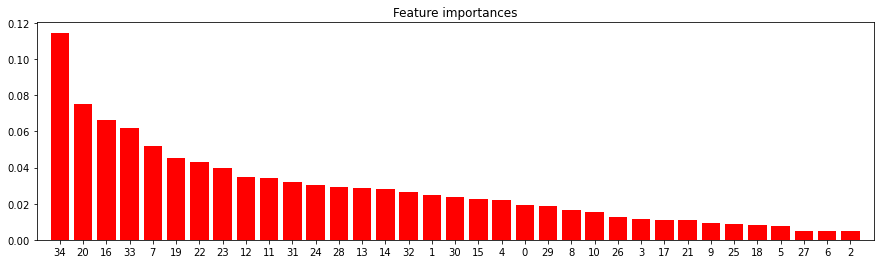

In [65]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure().set_figwidth(15)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

I forgot to add the random state when executing the code. I already used it for the other data models so I choose to use this one. 

In [ ]:
importances = np.array([0.01831044, 0.03237455, 0.0031967 , 0.012108  , 0.01552896,
       0.00758614, 0.00181886, 0.0546642 , 0.01587967, 0.01247531,
       0.02007783, 0.0364012 , 0.03424009, 0.03465867, 0.02593966,
       0.01570586, 0.05781482, 0.01149065, 0.00752398, 0.05290953,
       0.07132007, 0.01305223, 0.03959353, 0.04099451, 0.02862905,
       0.00649011, 0.00942123, 0.00436768, 0.03333931, 0.02942839,
       0.02490152, 0.02989014, 0.0245622 , 0.05561928, 0.11768564])

In [7]:
list1 = list(importances)

In [8]:
list2 = list(df.columns)

In [9]:
res = dict(zip(list2, list1))
res

{'A woman can apply for a passport in the same way as a man (1=yes; 0=no)': 0.01831044,
 'A woman can be head of household in the same way as a man (1=yes; 0=no)': 0.03237455,
 'A woman can choose where to live in the same way as a man (1=yes; 0=no)': 0.0031967,
 'A woman can get a job in the same way as a man (1=yes; 0=no)': 0.012108,
 'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)': 0.01552896,
 'A woman can open a bank account in the same way as a man (1=yes; 0=no)': 0.00758614,
 'A woman can register a business in the same way as a man (1=yes; 0=no)': 0.00181886,
 'A woman can sign a contract in the same way as a man (1=yes; 0=no)': 0.0546642,
 'A woman can travel outside her home in the same way as a man (1=yes; 0=no)': 0.01587967,
 'A woman can travel outside the country in the same way as a man (1=yes; 0=no)': 0.01247531,
 'A woman can work at night in the same way as a man (1=yes; 0=no)': 0.02007783,
 'A woman can work in a job deemed dangerous